# Tugas 1 Scrape Website pta.trunojoyo.ac.id with Beautiful Soap


*   Menggunakan Library BeautifulSoap
*  Data yang akan di Scrape ada di pta.trunojoyo.ac.id
*  Ouput yang diharapkan adalah NIM, Judul, Abstrak, Program Studi, Nama penulis, nama Dosen pembimbing I, Nama Dosen pembimbing II. dari jurusan Teknik Informatika dalam format csv



In [31]:
import pandas as pd
!pip install requests
!pip install html5lib
!pip install bs4

In [32]:
# constant
LAST_INDEX = -1
FIRST_INDEX = 1
INCREMENT_BY_ONE = 1

In [33]:
# import library
from bs4 import BeautifulSoup
import requests

In [34]:
def request_url(url):
    return requests.get(url)

def request_header_url(header, url_website):
    headers = {'User-Agent': header}
    return requests.get(url=url_website, headers=headers)

def parse_website(request):
    """Use html5lib library to parse"""
    return BeautifulSoup(request.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib

def prettify_web_structure(parsed_page):
    parsed_page.prettify()

def get_content_table(web_element, tag, attributes):
    return web_element.find(tag, attrs = attributes)

Scrape data untuk columns=["NIM", "Judul", "Abstrak", "Program Studi",])

In [35]:
r = request_header_url("Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1", "https://pta.trunojoyo.ac.id/c_search/byprod/10")
soup = parse_website(r)
prettify_web_structure(soup)
table = get_content_table(soup, "div", {"id":"wrapper"})

pagination = table.findAll("a", attrs = {"class":"pag_button"})
total_pages = int(pagination[LAST_INDEX]["href"].split("/")[LAST_INDEX])

papers = []
for pages in range(FIRST_INDEX, total_pages + INCREMENT_BY_ONE):

    url_link = "https://pta.trunojoyo.ac.id/c_search/byprod/10"
    id_prodi = url_link.split("/")[LAST_INDEX]
    nama_prodi = ""
    if (id_prodi == "10"):
        nama_prodi = "Teknik Informatika"

    r_pages = request_header_url("Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1", f"{url_link}/{pages}")
    soup_pages = parse_website(r_pages)
    prettify_web_structure(soup_pages)
    table_pages = get_content_table(soup_pages, "div", {"id":"wrapper"})

    for article_row in table_pages.findAll("a", attrs = {"class":"gray button"}):
        r_article_row = request_header_url("Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1", article_row["href"])
        soup_article_row = parse_website(r_article_row)
        prettify_web_structure(soup_article_row)
        table_article_row = get_content_table(soup_article_row, "li", {"data-id":"id-1", "data-cat":"#luxury"})
        article_row_title = table_article_row.find('a', attrs = {"class":"title", "href":"#"}).string
        article_row_abstract = table_article_row.find('p', attrs = {"align":"justify"}).string
        nim = str(article_row["href"]).split("/")[LAST_INDEX]
        papers.append([
            nim,
            article_row_title,
            article_row_abstract,
            nama_prodi
        ])

Scrape Data untuk columns=["Penulis", "Dosen Pembimbing 1", "Dosen Pembimbing 2"])

In [36]:
r = request_header_url("Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1", "https://pta.trunojoyo.ac.id/c_search/byprod/10")
soup = parse_website(r)
prettify_web_structure(soup)
table = get_content_table(soup, "div", {"id":"wrapper"})

pagination = table.findAll("a", attrs = {"class":"pag_button"})
total_pages = int(pagination[LAST_INDEX]["href"].split("/")[LAST_INDEX])

papersbaru = []
for pages in range(FIRST_INDEX, total_pages + INCREMENT_BY_ONE):

    url_link = "https://pta.trunojoyo.ac.id/c_search/byprod/10"
    id_prodi = url_link.split("/")[LAST_INDEX]
    nama_prodi = ""
    if (id_prodi == "10"):
        nama_prodi = "Teknik Informatika"

    r_pages = request_header_url("Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1", f"{url_link}/{pages}")
    soup_pages = parse_website(r_pages)
    prettify_web_structure(soup_pages)
    table_pages = get_content_table(soup_pages, "div", {"id":"wrapper"})

    for article_row in table_pages.findAll("li", attrs={"data-id": "id-1", "data-cat": "#luxury"}):
      authors_element = article_row.find('div', style="padding:2px 2px 2px 2px;")
      advisor1_element = article_row.find('div', style="padding:2px 2px 2px 2px;").find_next('span').find_next('span')
      advisor2_element = article_row.find('div', style="padding:2px 2px 2px 2px;").find_next('span').find_next('span').find_next('span')

      authors = authors_element.get_text()
      advisor1 = advisor1_element.get_text()
      advisor2 = advisor2_element.get_text()

      papersbaru.append([
          authors,
          advisor1,
          advisor2
          ])

Menggabungkan hasil scrape menjadi satu di result

In [44]:
# Membuat DataFrame dari list data
df1 = pd.DataFrame(papers, columns=["NIM", "Judul", "Abstrak", "Program Studi",])
df2 = pd.DataFrame(papersbaru, columns=["Penulis", "Dosen Pembimbing 1", "Dosen Pembimbing 2"])

# Menggabungkan DataFrame berdasarkan index (axis=1)
result = pd.concat([df1, df2], axis=1)

print(result)

              NIM                                              Judul  \
0    040411100468  PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...   
1    040411100476  APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...   
2    040411100480  RANCANG BANGUN APLIKASI PROXY SERVER UNTUK\nEN...   
3    070411100070  SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...   
4    080411100115  SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...   
..            ...                                                ...   
853  160411100032  PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...   
854  160411100182  SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...   
855  160411100077  KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...   
856  160411100084  IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...   
857  160411100044  DETEKSI OBJEK MANUSIA BERBASIS ONE STAGE DETEC...   

                                               Abstrak       Program Studi  \
0    Sistem  informasi  akademik  (SIAKAD) merupaka...  T

In [38]:
# result = pd.DataFrame(result, columns=["NIM", "Judul", "Abstrak", "Program Studi", "Penulis", "Dosen Pembimbing 1", "Dosen Pembimbing 2"])

In [43]:
result.to_csv("papers.csv", index=False)

File akan disimpan secara otomatis,
anda bisa mendownloadnya


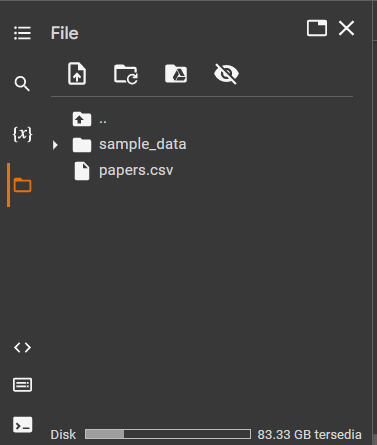

In [40]:
# Memuat file CSV sebagai dataframe
result = pd.read_csv('papers.csv')

In [41]:
# Menampilkan dataframe menggunakan fungsi display()
display(result)

,NIM,Judul,Abstrak,Program Studi,Penulis,Dosen Pembimbing 1,Dosen Pembimbing 2
0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Sistem informasi akademik (SIAKAD) merupaka...,Teknik Informatika,Penulis : A.Ubaidillah S.Kom,Dosen Pembimbing I : Budi Setyono M.T,Dosen Pembimbing II :Hermawan S.T
1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,"Penulis : M. Basith Ardianto,","Dosen Pembimbing I : Drs. Budi Soesilo, MT","Dosen Pembimbing II :Koko Joni, ST"
2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK\nEN...,Web server adalah sebuah perangkat lunak serve...,Teknik Informatika,"Penulis : Akhmad Suyandi, S.Kom","Dosen Pembimbing I : Drs. Budi Soesilo, M.T","Dosen Pembimbing II :Hermawan, ST, MT"
3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Teknik Informatika,Penulis : Heri Supriyanto,"Dosen Pembimbing I : Mulaab, S.Si., M.Kom","Dosen Pembimbing II :Firli Irhamni, ST., M.Kom"
4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,Penulis : Septian Rahman Hakim,"Dosen Pembimbing I : Arik Kurniawati, S.Kom., ...","Dosen Pembimbing II :Haryanto, S.T., M.T."
...,...,...,...,...,...,...,...
853,160411100032,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Investasi saham selama ini memiliki resiko ker...,Teknik Informatika,Penulis : Rachmad Agung Pambudi,"Dosen Pembimbing I : Eka Mala Sari Rochman, S....","Dosen Pembimbing II :Sri Herawati, S.Kom., M.Kom"
854,160411100182,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Information Retrieval (IR) merupakan pengambil...,Teknik Informatika,Penulis : Nadila Hidayanti,"Dosen Pembimbing I : Achmad Jauhari, S.T., M.Kom","Dosen Pembimbing II :Ika Oktavia Suzanti, S.Ko..."
855,160411100077,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Klasifikasi citra merupakan proses pengelompok...,Teknik Informatika,Penulis : Afni Sakinah,Dosen Pembimbing I : Dr. Indah Agustien Siradj...,"Dosen Pembimbing II :Moch. Kautsar Sophan, S.K..."
856,160411100084,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Identifikasi atribut pejalan kaki merupakan sa...,Teknik Informatika,Penulis : Friska Fatmawatiningrum,Dosen Pembimbing I : Dr. Indah Agustien Siradj...,"Dosen Pembimbing II :Prof. Dr. Arief Muntasa, ..."
